
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [135]:
# Set your student number
student_number = '401105689'
Name = 'Sana'
Last_Name = 'Babayan'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [136]:
!pip install tsp_solver2
!pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp

from random import seed
from random import randint


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [138]:
class TSP:

  def __init__(self, num_cities, cities = None):
    if cities is None:
      self.cities = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(num_cities)]
    else:
      self.cities = cities
    self.num_cities = num_cities

  def distance(self, A, B):
    x1, y1 = self.cities[A]
    x2, y2 = self.cities[B]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

  def tour_length(self, tour):
    total_length = 0
    for i in range(len(tour)):
      total_length += self.distance(tour[i], tour[(i + 1) % self.num_cities])
    return total_length

  def shortest_tour(self, tours):
    shortest_length = float('inf')
    shortest_tour = None
    for tour in tours:
      length = self.tour_length(tour)
      if length < shortest_length:
          shortest_length = length
          shortest_tour = tour
    return shortest_tour, shortest_length

  def plot_tour(self, tour):
    # Extract city coordinates from self.cities
    x_coords, y_coords = zip(*self.cities)

    # Plot the cities
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Cities')

    # Plot the tour (connect cities in order)
    for i in range(len(tour)):
        city1 = tour[i]
        city2 = tour[(i + 1) % self.num_cities]  # Wrap around to the first city
        plt.plot([x_coords[city1], x_coords[city2]], [y_coords[city1], y_coords[city2]], color='red', linewidth=1)

    plt.title('TSP Tour')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

  def nearest_neighbor(self, A, cities, count = None):
    distances = [(self.distance(A, B), B) for B in range(self.num_cities) if B != A]
    distances.sort()
    if count is None:
        return distances[0][1]
    else:
        return [distances[i][1] for i in range(min(count, self.num_cities - 1))]

  def calculate_distances(self):
      result = [[] for _ in range(self.num_cities)]
      for i in range(1, self.num_cities):
          for j in range(0, i):
              result[i].append(self.distance(j, i))
      return result  

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [139]:
def alltours_tsp(tsp):
  def generate_tours(current_tour, remaining_cities):
    if not remaining_cities:
      # Base case: All cities visited, return the tour length
      return tsp.tour_length(current_tour), current_tour

    shortest_length = float('inf')
    shortest_tour = None

    for next_city in remaining_cities:
      new_tour = current_tour + [next_city]
      new_remaining = [city for city in remaining_cities if city != next_city]
      length, tour = generate_tours(new_tour, new_remaining)

      if length < shortest_length:
        shortest_length = length
        shortest_tour = tour

    return shortest_length, shortest_tour

  # Start with an empty tour and all cities
  initial_tour = []
  all_cities = list(range(tsp.num_cities))
  shortest_length, shortest_tour = generate_tours(initial_tour, all_cities)

  return shortest_tour


Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [140]:
tsp_country = TSP(num_cities=5)

shortest_tour = alltours_tsp(tsp_country)

print("Shortest tour:", shortest_tour)
print("Tour length:", tsp_country.tour_length(shortest_tour))


Shortest tour: [1, 4, 0, 3, 2]
Tour length: 2414.430224615742


Visualize your answer for the TSP problem

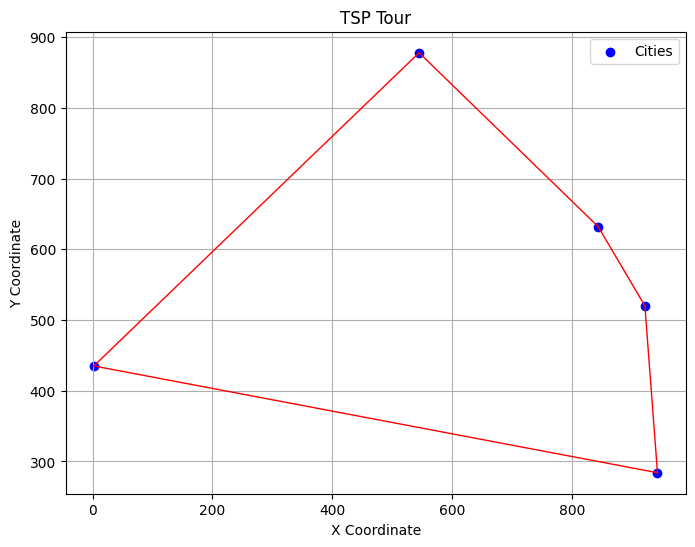

In [141]:
tsp_country.plot_tour(alltours_tsp(tsp_country))



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

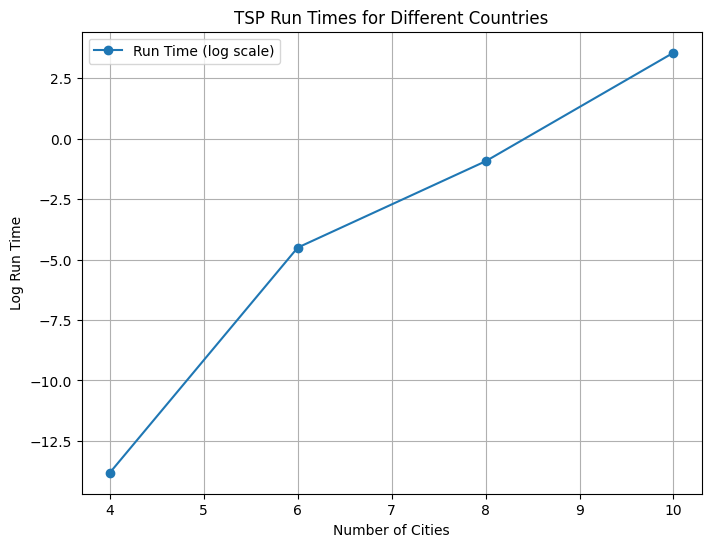

In [143]:
countries = {}
for size in [4, 6, 8, 10]:
    countries[size] = TSP(num_cities=size)

run_times = {}
for size, country in countries.items():
    start_time = time.time()
    shortest_tour = alltours_tsp(country)
    end_time = time.time()
    run_times[size] = end_time - start_time

plt.figure(figsize=(8, 6))
log_run_times = np.log(np.array(list(run_times.values())) + 1e-6)
plt.plot(list(run_times.keys()), log_run_times, marker='o', label='Run Time (log scale)')
plt.xlabel('Number of Cities')
plt.ylabel('Log Run Time')
plt.title('TSP Run Times for Different Countries')
plt.grid(True)
plt.legend()
plt.show()

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [145]:
def random_initial(tsp):
  cities = list(range(tsp.num_cities))
  random.shuffle(cities)
  tour_length = tsp.tour_length(cities)
  return cities, tour_length 

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [146]:
def nearest_neighbor_initial(tsp):
  cities_to_visit = list(range(tsp.num_cities))
  random.shuffle(cities_to_visit)
  current_city = cities_to_visit.pop()

  tour = [current_city]
  total_length = 0

  while cities_to_visit:
    nearest_dist = float('inf')
    nearest_city = None

    for next_city in cities_to_visit:
      dist = tsp.distance(current_city, next_city)
      if dist < nearest_dist:
        nearest_dist = dist
        nearest_city = next_city

    tour.append(nearest_city)
    total_length += nearest_dist
    current_city = nearest_city
    cities_to_visit.remove(nearest_city)

  total_length += tsp.distance(tour[-1], tour[0])
  return tour, total_length

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [147]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
    if repetitions is None:
        repetitions = tsp.num_cities

    best_tour = None
    best_length = float('inf')

    for _ in range(repetitions):
        tour, length = nearest_neighbor_initial(tsp)
        if length < best_length:
            best_length = length
            best_tour = tour

    return best_tour, best_length

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

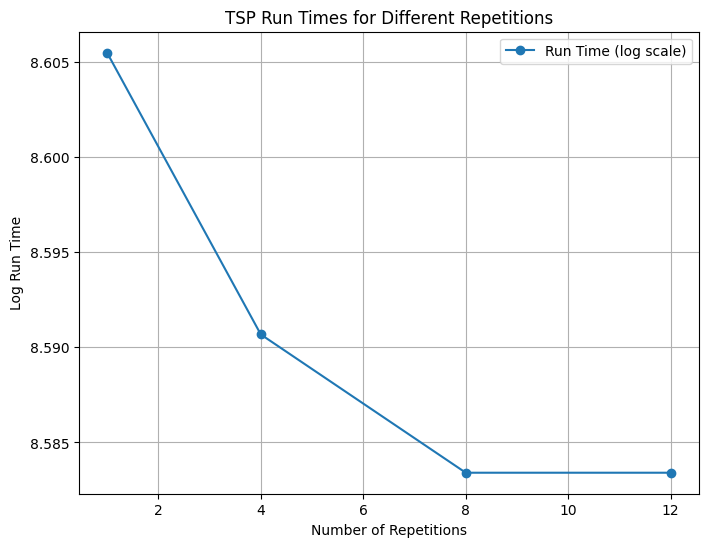

In [151]:
country = TSP(num_cities=30)

run_times = {}
run_times[1] = repeated_nearest_neighbor_initial(country, repetitions=1)[1]
run_times[4] = repeated_nearest_neighbor_initial(country, repetitions=4)[1]
run_times[8] = repeated_nearest_neighbor_initial(country, repetitions=8)[1]
run_times[12] = repeated_nearest_neighbor_initial(country, repetitions=12)[1]

plt.figure(figsize=(8, 6))
plt.plot(list(run_times.keys()), np.log(list(run_times.values())), marker='o', label='Run Time (log scale)')
plt.xlabel('Number of Repetitions')
plt.ylabel('Log Run Time')
plt.title('TSP Run Times for Different Repetitions')
plt.grid(True)
plt.legend()
plt.show()

Does repetition make our answer optimal? "Yes, It makes it optimal and in a shorter time."

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [152]:
def beam_search_initial(tsp, n, iter):
  queue = []
  for _ in range(n):
    semi_tour, length = nearest_neighbor_initial(tsp)
    queue.append((semi_tour, length))
  for _ in range(iter):
    new_queue = []

    for semi_tour, _ in queue:
      for next_city in semi_tour:
        neighbors = tsp.nearest_neighbor(next_city, tsp.cities, count=n)
        for neighbor in neighbors:
          new_tour = semi_tour + [neighbor]
          new_length = tsp.tour_length(new_tour)
          new_queue.append((new_tour, new_length))

    new_queue.sort(key=lambda x: x[1])
    queue = new_queue[:n]
  best_tour, best_length = min(queue, key=lambda x: x[1])
  return best_tour, best_length

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [153]:
country = TSP(num_cities=30)

print("random_initial length :  ", random_initial(country)[1])
print("nearest_neighbor_initial length :  ", nearest_neighbor_initial(country)[1])
print("repeated_nearest_neighbor_initial length :  ", repeated_nearest_neighbor_initial(country)[1])
print("beam_search_initial length :  ", beam_search_initial(country, country.num_cities, country.num_cities)[1])

random_initial length :   16145.569420441188
nearest_neighbor_initial length :   5734.142969308962
repeated_nearest_neighbor_initial length :   5338.846778715279


beam_search_initial length :   5272.932442270769


Plot these tours and compare them visually.

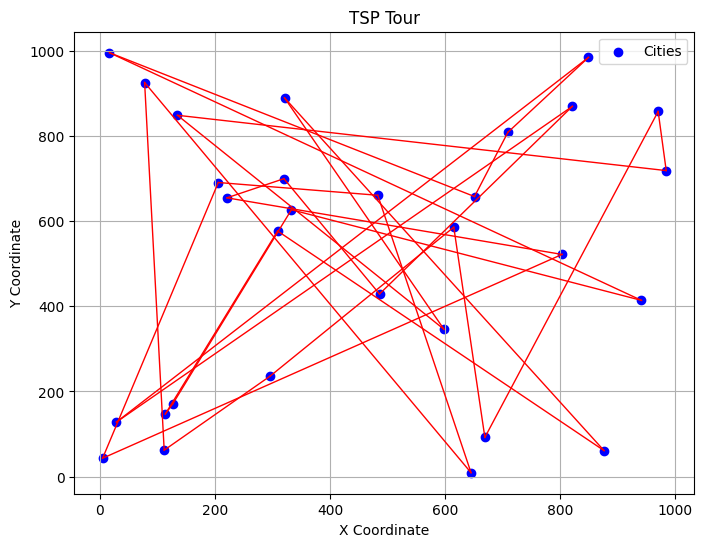

In [154]:
# TODO: plot the tours accordingly (random)
country.plot_tour(random_initial(country)[0])

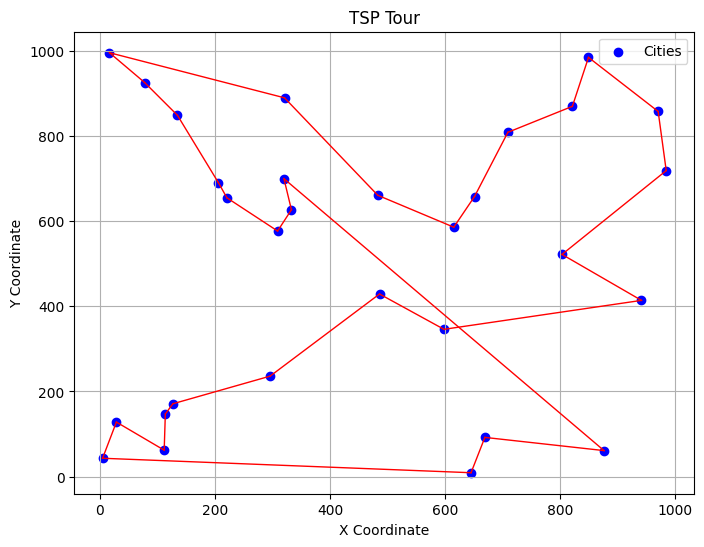

In [155]:
# TODO: plot the tours accordingly (nn)
country.plot_tour(nearest_neighbor_initial(country)[0])

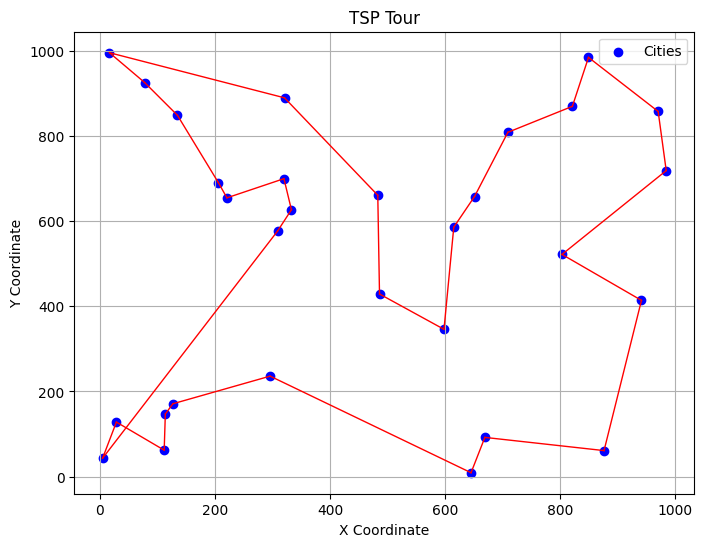

In [156]:
# TODO: plot the tours accordingly (rnn)
country.plot_tour(repeated_nearest_neighbor_initial(country)[0])

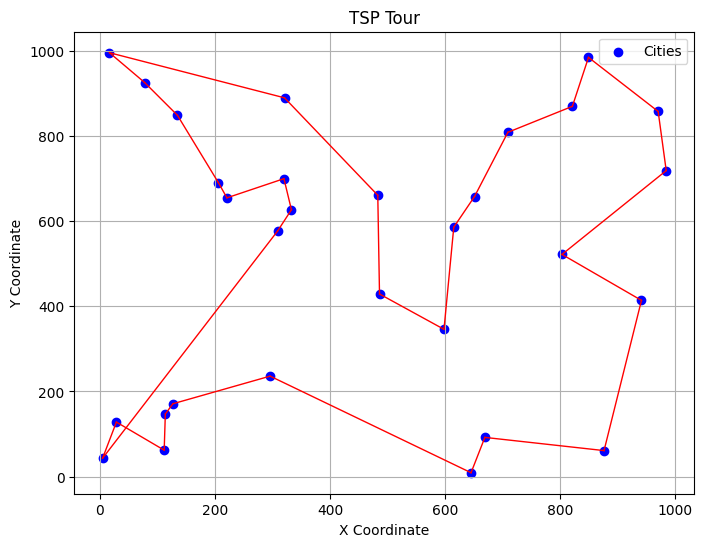

In [157]:
# TODO: plot the tours accordingly (beam)
country.plot_tour(beam_search_initial(country, country.num_cities, country.num_cities)[0])

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [159]:
def lin_kernighan(tsp, initial, iterations=10):
  tour = initial
  tour_length = tsp.tour_length(tour)

  for _ in range(iterations):
    for i in range(tsp.num_cities):
      for j in range(i + 2, tsp.num_cities):
        # Reverse the tour from index i to index j
        reversed_tour = tour[:i] + tour[i:j][::-1] + tour[j:]

        # Calculate the length of the reversed tour
        reversed_length = tsp.tour_length(reversed_tour)

        # If the reversed tour is better, update the tour
        if reversed_length < tour_length:
          tour = reversed_tour
          tour_length = reversed_length

  return tour, tour_length


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

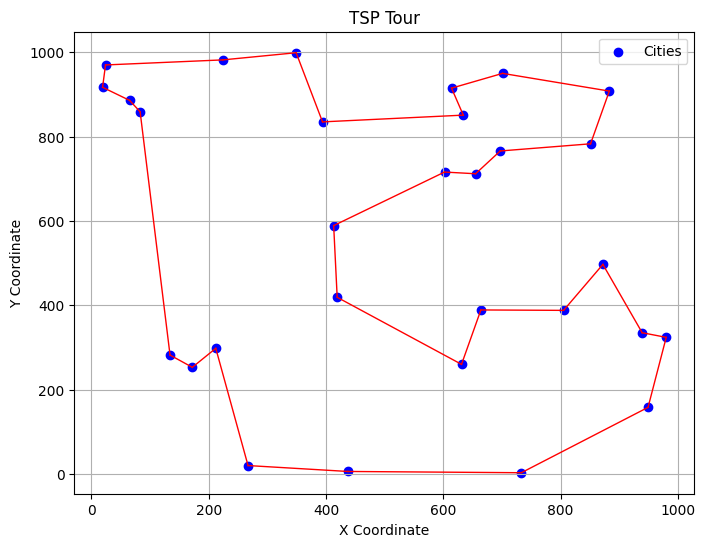

In [160]:
tsp_instance = TSP(num_cities=30)
initial_tour, _ = nearest_neighbor_initial(tsp_instance)
lk_tour, lk_length = lin_kernighan(tsp_instance, initial_tour, iterations=10)
tsp_instance.plot_tour(lk_tour)

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [161]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
  current_tour = initial
  current_length = tsp.tour_length(current_tour)
  temperature = initial_temperature

  for _ in range(num_iterations):
    i, j = random.sample(range(tsp.num_cities), 2)
    neighbor_tour = current_tour[:i] + current_tour[i:j][::-1] + current_tour[j:]
    neighbor_length = tsp.tour_length(neighbor_tour)
    delta_length = neighbor_length - current_length

    try:
      acceptance_prob = np.exp(-delta_length / temperature)
    except OverflowError:
      acceptance_prob = 0.0  # Set a safe value

    if delta_length < 0 or random.random() < acceptance_prob:
      current_tour = neighbor_tour
      current_length = neighbor_length
    temperature *= cooling_rate
  return current_tour, current_length

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

C:\Users\fansaba\AppData\Local\Temp\ipykernel_14272\526509030.py:13: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-delta_length / temperature)


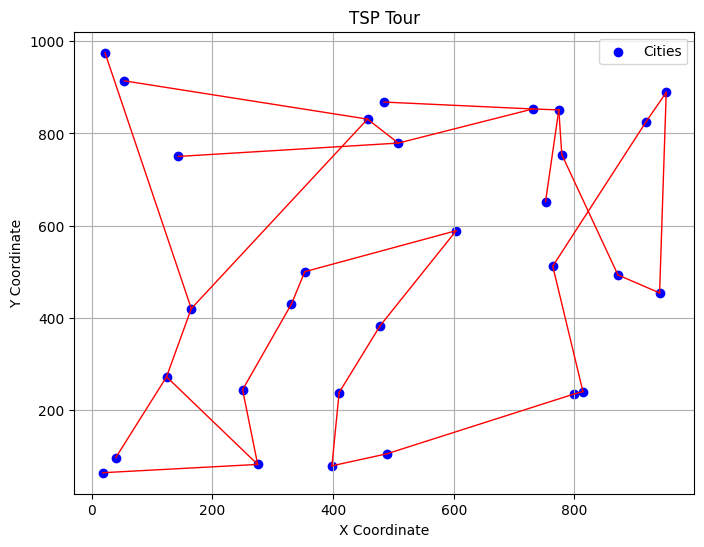

In [162]:
tsp_instance = TSP(num_cities=30)
initial_tour, _ = nearest_neighbor_initial(tsp_instance)
sa_tour, sa_length = simulated_annealing(tsp_instance, initial_tour, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)
tsp_instance.plot_tour(sa_tour)

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

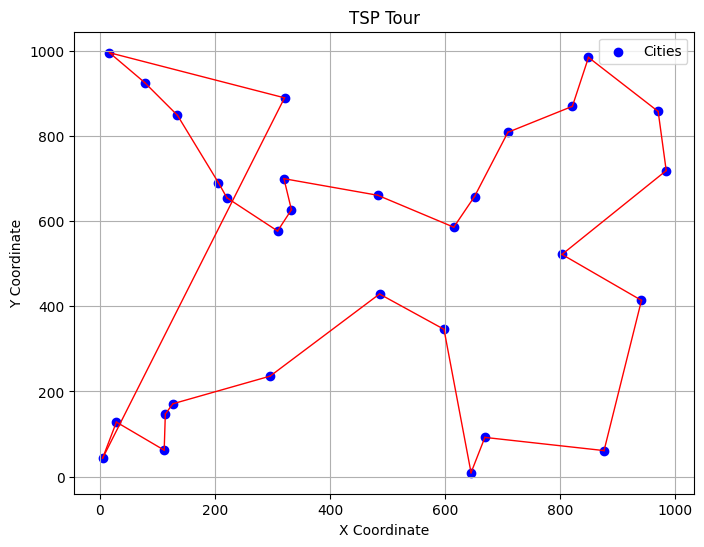

5332.388937245172


In [164]:
path = solve_tsp(country.calculate_distances())
country.plot_tour(path)
print(country.tour_length(path))

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

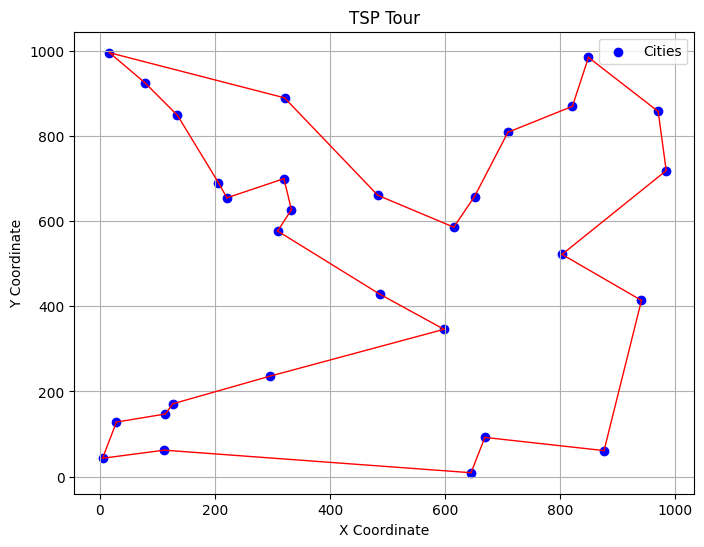

LKH with random_initial length :  5013.798890713197


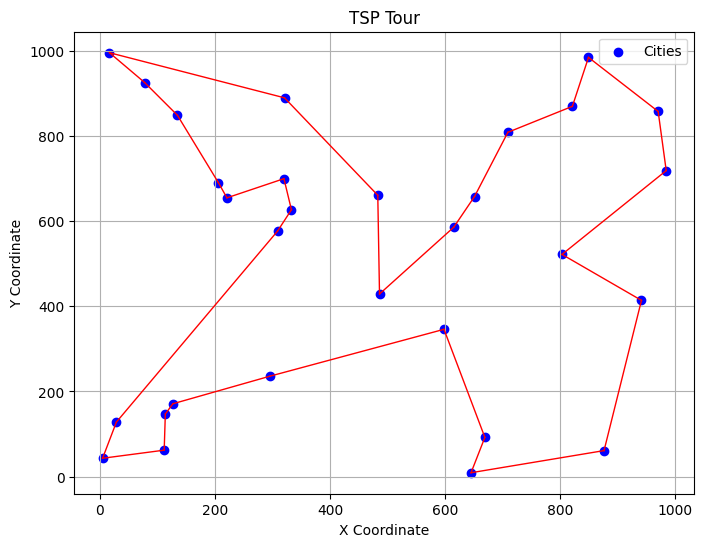

LKH with nearest_neighbor_initial length :  5209.730851272652


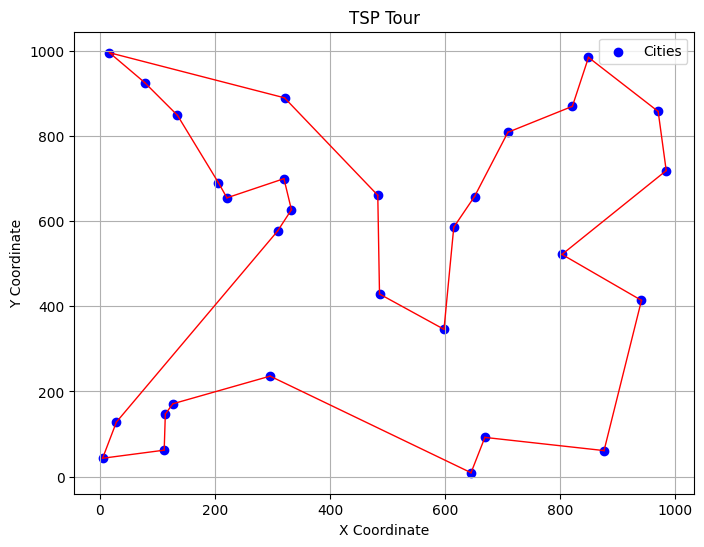

LKH with repeated_nearest_neighbor_initial length :  5190.24615260906


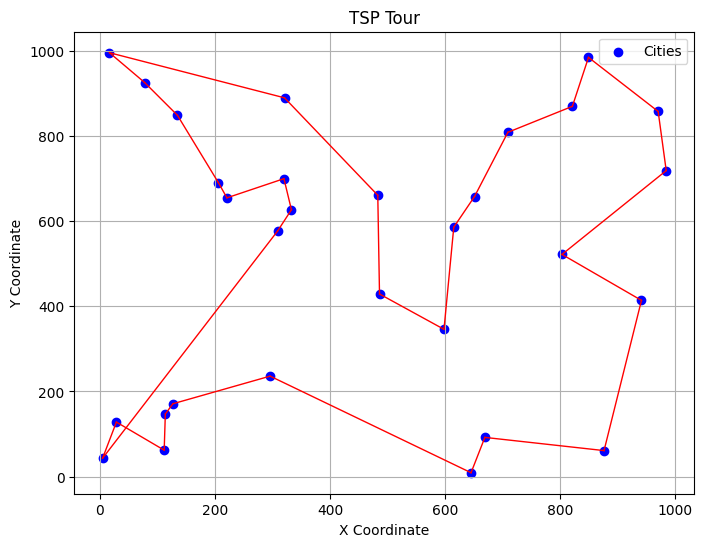

LKH with beam_search_initial length :  5272.932442270769


C:\Users\fansaba\AppData\Local\Temp\ipykernel_14272\526509030.py:13: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-delta_length / temperature)


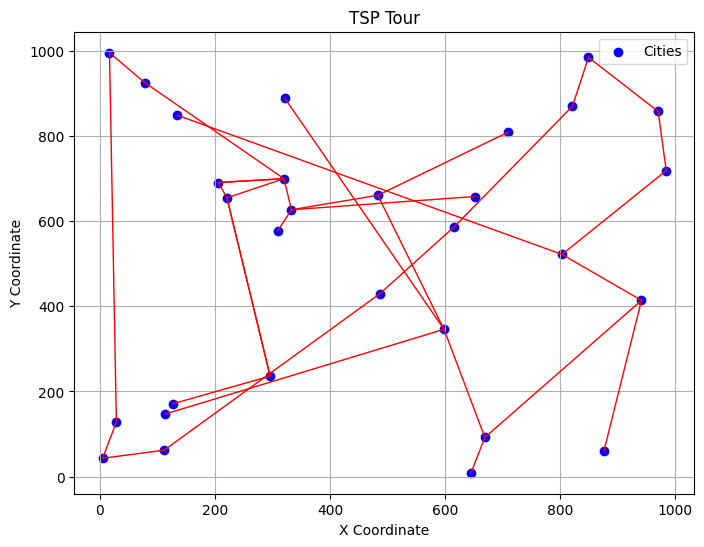

simulated annealing with random_initial length :  9068.670163762376


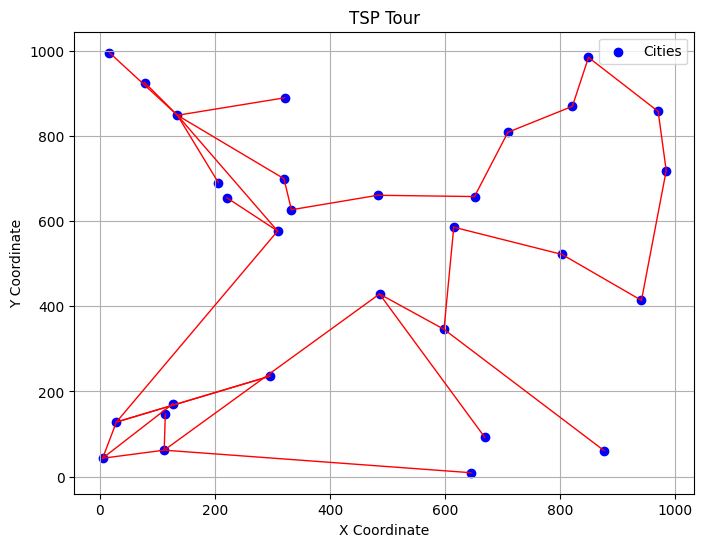

simulated annealing with nearest_neighbor_initial length :  6911.877190417575


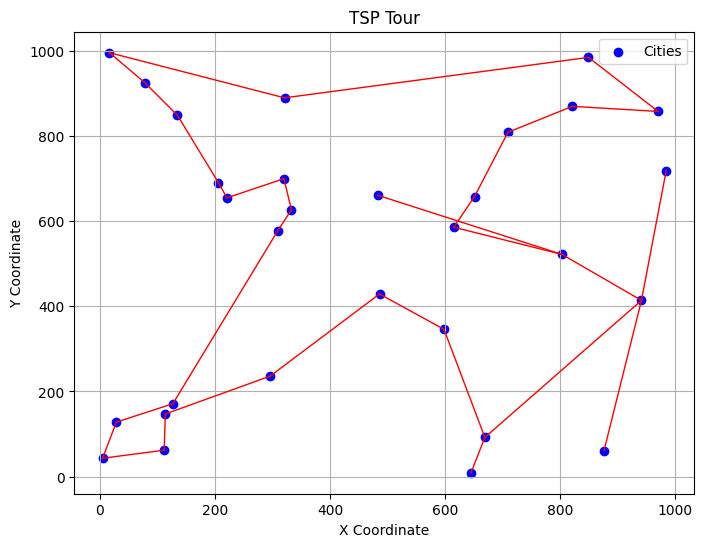

simulated annealing with repeated_nearest_neighbor_initial length :  5800.448239536588


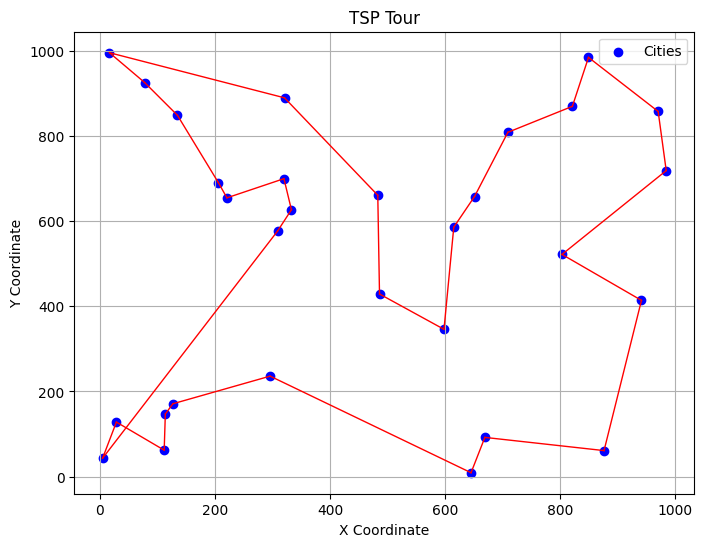

simulated annealing with beam_search_initial length :  5272.932442270769


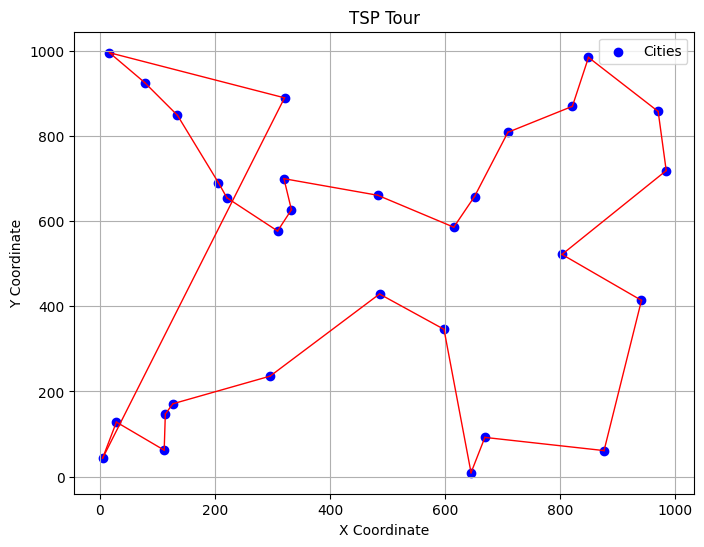

using solve_tsp :  5332.388937245172


In [165]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function

#print("random_initial length :  ", random_initial(country)[1])
#print("nearest_neighbor_initial length :  ", nearest_neighbor_initial(country)[1])
#print("repeated_nearest_neighbor_initial length :  ", repeated_nearest_neighbor_initial(country)[1])
#print("beam_search_initial length :  ", beam_search_initial(country, country.num_cities, country.num_cities)[1])

LKH = [(0, 0), (0, 0), (0, 0), (0, 0)]
LKH[0] = lin_kernighan(country, random_initial(country)[0], iterations=10)
LKH[1] = lin_kernighan(country, nearest_neighbor_initial(country)[0], iterations=10)
LKH[2] = lin_kernighan(country, repeated_nearest_neighbor_initial(country)[0], iterations=10)
LKH[3] = lin_kernighan(country, beam_search_initial(country, country.num_cities, country.num_cities)[0], iterations=10)

country.plot_tour(LKH[0][0])
print("LKH with random_initial length : ", LKH[0][1])

country.plot_tour(LKH[1][0])
print("LKH with nearest_neighbor_initial length : ", LKH[1][1])

country.plot_tour(LKH[2][0])
print("LKH with repeated_nearest_neighbor_initial length : ", LKH[2][1])

country.plot_tour(LKH[3][0])
print("LKH with beam_search_initial length : ", LKH[3][1])


SA = [(0, 0), (0, 0), (0, 0), (0, 0)]
SA[0] = simulated_annealing(country, random_initial(country)[0], initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)
SA[1] = simulated_annealing(country, nearest_neighbor_initial(country)[0], initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)
SA[2] = simulated_annealing(country, repeated_nearest_neighbor_initial(country)[0], initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)
SA[3] = simulated_annealing(country, beam_search_initial(country, country.num_cities, country.num_cities)[0], initial_temperature=1000, cooling_rate=0.99, num_iterations=10000)

country.plot_tour(SA[0][0])
print("simulated annealing with random_initial length : ", SA[0][1])

country.plot_tour(SA[1][0])
print("simulated annealing with nearest_neighbor_initial length : ", SA[1][1])

country.plot_tour(SA[2][0])
print("simulated annealing with repeated_nearest_neighbor_initial length : ", SA[2][1])

country.plot_tour(SA[3][0])
print("simulated annealing with beam_search_initial length : ", SA[3][1])

solve_tsp_tour = solve_tsp(country.calculate_distances())
country.plot_tour(solve_tsp_tour)
print("using solve_tsp : ", country.tour_length(solve_tsp_tour))